**Problem Statement:**

You are working for a new-age insurance company and employ mutiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance. 


In [ ]:
# import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import imblearn
from matplotlib import pyplot
import pickle

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/sethukrish6420/sethuraman/main/train.csv')
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


**Understand the data**

In [ ]:
df.shape

(45211, 11)

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [ ]:
df.nunique()

age                 77
job                 12
marital              3
education_qual       4
call_type            3
day                 31
mon                 12
dur               1573
num_calls           48
prev_outcome         4
y                    2
dtype: int64

In [ ]:
df['age'].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88])

In [ ]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
df['education_qual'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [ ]:
df['call_type'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [ ]:
df['day'].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31])

In [ ]:
df['mon'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [ ]:
df['num_calls'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

In [ ]:
df['prev_outcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [ ]:
df['dur'].max()

4918

In [ ]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

**Clean the data**

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [ ]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
df['job'] = df['job'].map(lambda x: 'blue-collar' if x == 'unknown' else x)

In [ ]:
df['job'].value_counts()

blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

In [ ]:
df['education_qual'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64

In [ ]:
df['education_qual'] = df['education_qual'].map(lambda x: 'secondary' if x == 'unknown' else x)

In [ ]:
df['education_qual'].value_counts()

secondary    25059
tertiary     13301
primary       6851
Name: education_qual, dtype: int64

In [ ]:
df['call_type'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

In [ ]:
df['prev_outcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [ ]:
df.shape

(45211, 11)

In [ ]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


**Checking Outliers**

In [ ]:
# In age column

iqr = 48-33
iqr

15

In [ ]:
lower_fence = 33 - 1.5*iqr
lower_fence

10.5

In [ ]:
upper_fence = 48 + 1.5*iqr
upper_fence

70.5

In [ ]:
df = df[ df['age'] < upper_fence]
df = df[df['age'] > lower_fence]

In [ ]:
df['age'].describe()

count    44724.000000
mean        40.545524
std          9.978232
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         70.000000
Name: age, dtype: float64

In [ ]:
# In day column
iqr = 21- 8
iqr

13

In [ ]:
df = df[df['day'] > (8 - (1.5*iqr))]
df = df[df['day'] < (21 + (1.5*iqr))]

In [ ]:
df['day'].describe()

count    44724.000000
mean        15.812718
std          8.324820
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64

In [ ]:
# In dur column
iqr = 319 - 103
iqr

216

In [ ]:
df = df[df['dur'] > (103 - (1.5*iqr))]
df = df[df['dur'] < (319 + (1.5*iqr))]
df['dur'].describe()

count    41531.000000
mean       202.784763
std        140.528686
min          0.000000
25%         98.000000
50%        167.000000
75%        276.000000
max        642.000000
Name: dur, dtype: float64

In [ ]:
# In num_calls column
iqr = 3 - 1
iqr

2

In [ ]:
df = df[df['num_calls'] > (1 - (1.5*iqr))]
df = df[df['num_calls'] < (3 + (1.5*iqr))]
df['num_calls'].describe()

count    37449.000000
mean         2.004807
std          1.140395
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: num_calls, dtype: float64

In [ ]:
df.drop_duplicates()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,secondary,unknown,5,may,92,1,unknown,no
4,33,blue-collar,single,secondary,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45202,34,admin.,single,secondary,cellular,17,nov,224,1,unknown,yes
45203,23,student,single,tertiary,cellular,17,nov,266,1,unknown,yes
45205,25,technician,single,secondary,cellular,17,nov,386,2,unknown,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [ ]:
df.shape

(37449, 11)

In [ ]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

**EDA**

In [ ]:
df['target'] = df['y'].map({'yes':1,'no':0})

In [ ]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no,0
3,47,blue-collar,married,secondary,unknown,5,may,92,1,unknown,no,0
4,33,blue-collar,single,secondary,unknown,5,may,198,1,unknown,no,0


<AxesSubplot:xlabel='y', ylabel='age'>

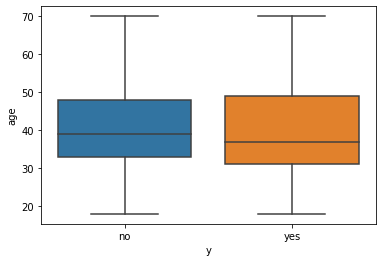

In [ ]:
sns.boxplot(data=df,x='y',y='age')

<AxesSubplot:xlabel='job', ylabel='Count'>

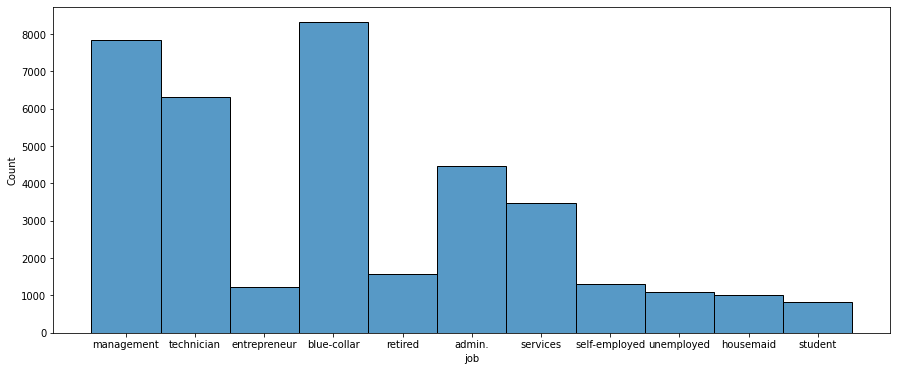

In [ ]:
plt.figure(figsize = (15,6))
sns.histplot(data=df,x='job')

<AxesSubplot:ylabel='job'>

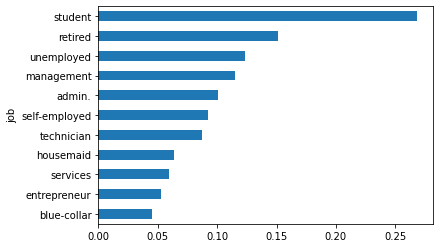

In [ ]:
df.groupby('job')['target'].mean().sort_values().plot(kind='barh')

<AxesSubplot:xlabel='marital', ylabel='Count'>

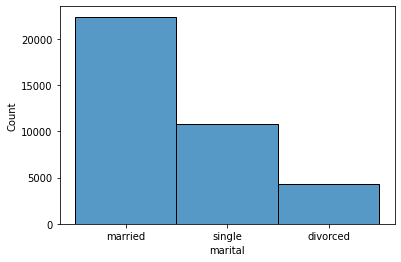

In [ ]:
sns.histplot(data=df,x='marital')

<AxesSubplot:ylabel='marital'>

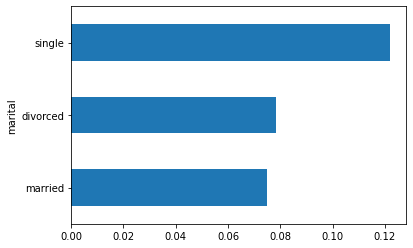

In [ ]:
df.groupby('marital')['target'].mean().sort_values().plot(kind='barh')

<AxesSubplot:xlabel='education_qual', ylabel='Count'>

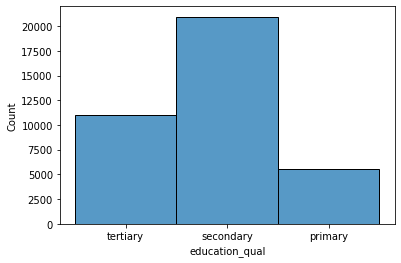

In [ ]:
sns.histplot(data=df,x='education_qual')

<AxesSubplot:ylabel='education_qual'>

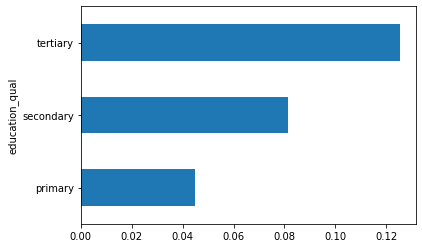

In [ ]:
df.groupby('education_qual')['target'].mean().sort_values().plot(kind='barh')

<AxesSubplot:xlabel='call_type', ylabel='Count'>

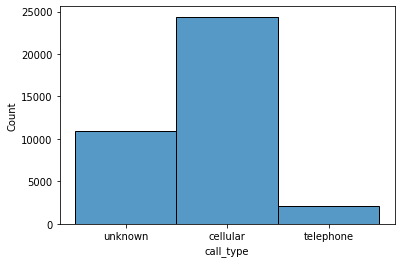

In [ ]:
sns.histplot(data=df,x='call_type')

<AxesSubplot:ylabel='call_type'>

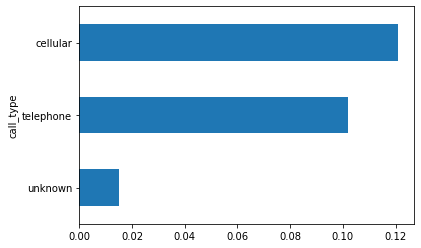

In [ ]:
df.groupby('call_type')['target'].mean().sort_values().plot(kind='barh')

<AxesSubplot:xlabel='y', ylabel='day'>

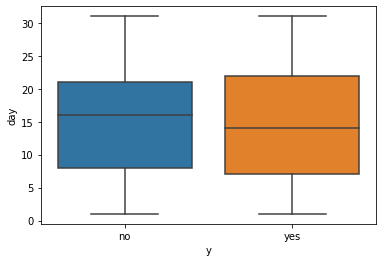

In [ ]:
sns.boxplot(data=df,x='y',y='day')

<AxesSubplot:xlabel='mon', ylabel='Count'>

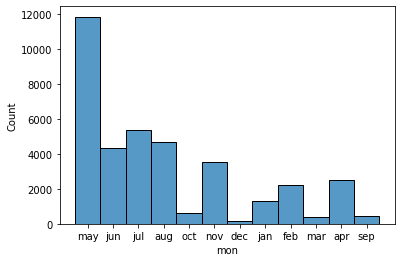

In [ ]:
sns.histplot(data=df,x='mon')

<AxesSubplot:ylabel='mon'>

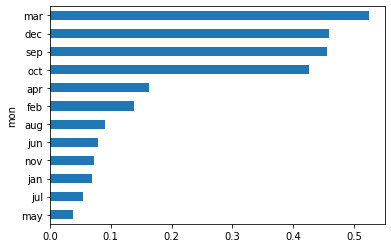

In [ ]:
df.groupby('mon')['target'].mean().sort_values().plot(kind='barh')

<AxesSubplot:xlabel='y', ylabel='dur'>

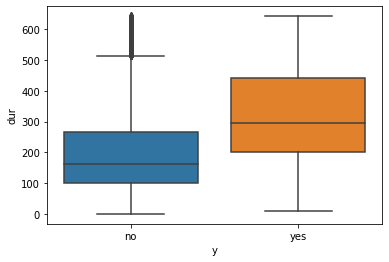

In [ ]:
sns.boxplot(data=df,x='y',y='dur')

<AxesSubplot:xlabel='y', ylabel='num_calls'>

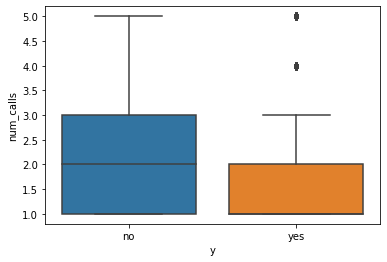

In [ ]:
sns.boxplot(data=df,x='y',y='num_calls')

<AxesSubplot:xlabel='prev_outcome', ylabel='Count'>

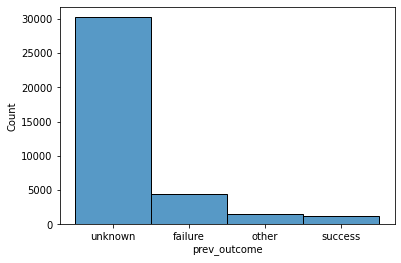

In [ ]:
sns.histplot(data=df,x='prev_outcome')

<AxesSubplot:ylabel='prev_outcome'>

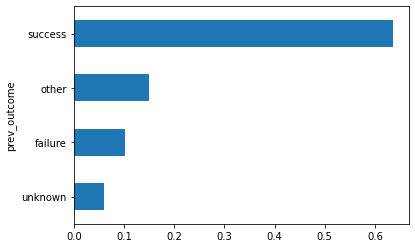

In [ ]:
df.groupby('prev_outcome')['target'].mean().sort_values().plot(kind='barh')

<AxesSubplot:xlabel='job', ylabel='dur'>

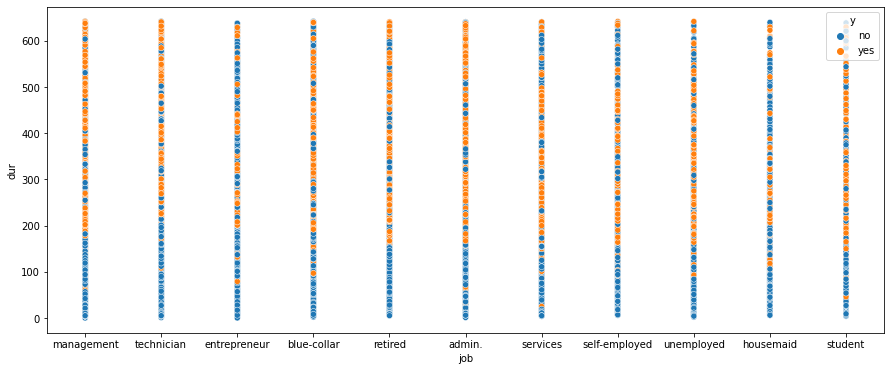

In [ ]:
plt.figure(figsize = (15,6))
sns.scatterplot(data=df,x='job',y='dur',hue='y')

<AxesSubplot:xlabel='marital', ylabel='dur'>

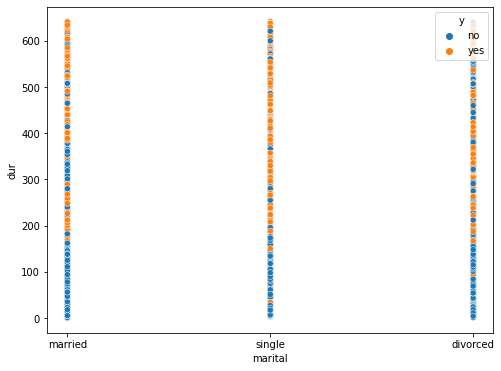

In [ ]:
plt.figure(figsize = (8,6))
sns.scatterplot(data=df,x='marital',y='dur',hue='y')

<AxesSubplot:xlabel='education_qual', ylabel='dur'>

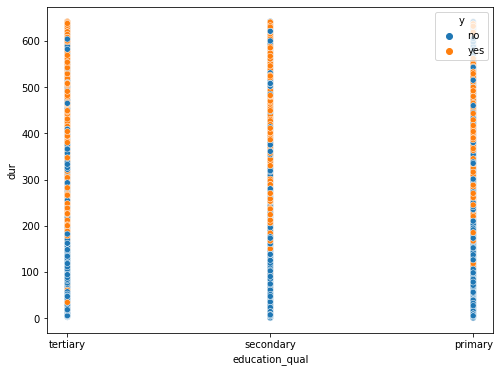

In [ ]:
plt.figure(figsize = (8,6))
sns.scatterplot(data=df,x='education_qual',y='dur',hue='y')

<AxesSubplot:xlabel='job', ylabel='num_calls'>

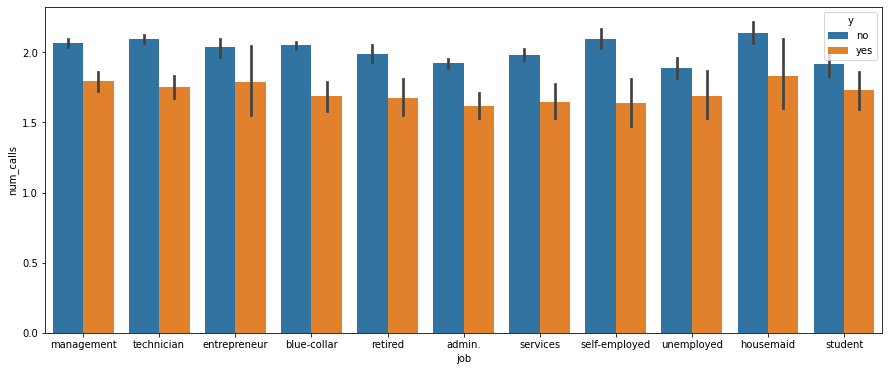

In [ ]:
plt.figure(figsize = (15,6))
sns.barplot(data=df,x='job',y='num_calls',hue='y')

<AxesSubplot:xlabel='marital', ylabel='num_calls'>

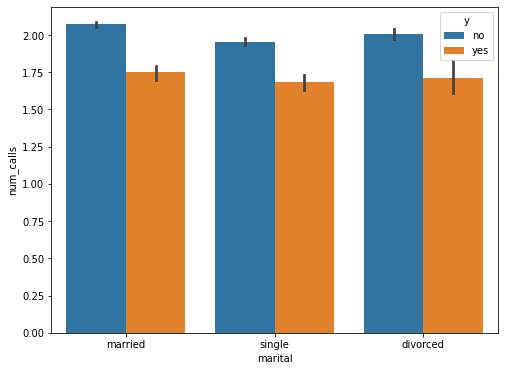

In [ ]:
plt.figure(figsize = (8,6))
sns.barplot(data=df,x='marital',y='num_calls',hue='y')

<AxesSubplot:xlabel='marital', ylabel='num_calls'>

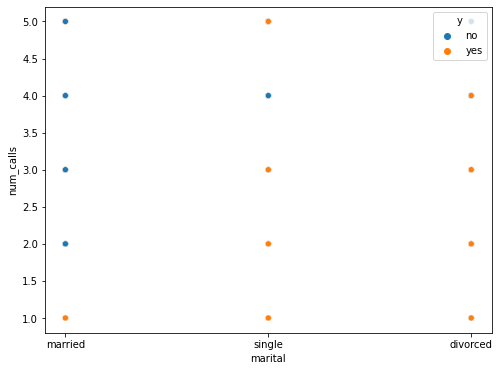

In [ ]:
plt.figure(figsize = (8,6))
sns.scatterplot(data=df,x='marital',y='num_calls',hue='y')

<AxesSubplot:xlabel='job', ylabel='mon'>

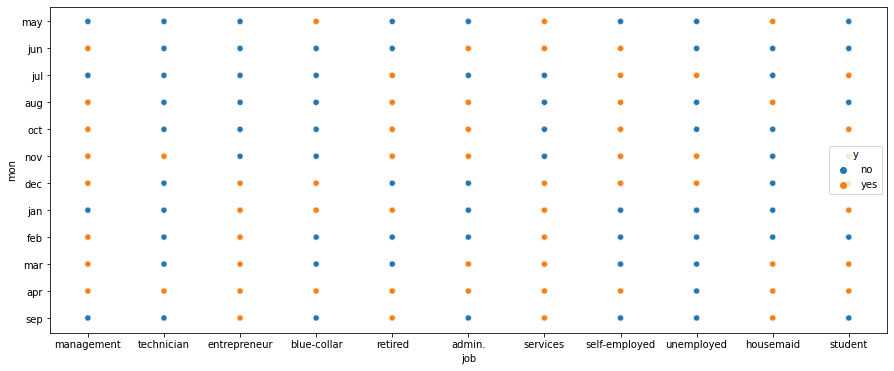

In [ ]:
plt.figure(figsize = (15,6))
sns.scatterplot(data=df,x='job',y='mon',hue='y')

<AxesSubplot:xlabel='marital', ylabel='mon'>

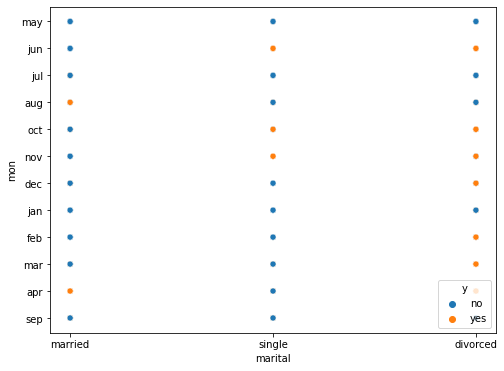

In [ ]:
plt.figure(figsize = (8,6))
sns.scatterplot(data=df,x='marital',y='mon',hue='y')

<AxesSubplot:xlabel='education_qual', ylabel='mon'>

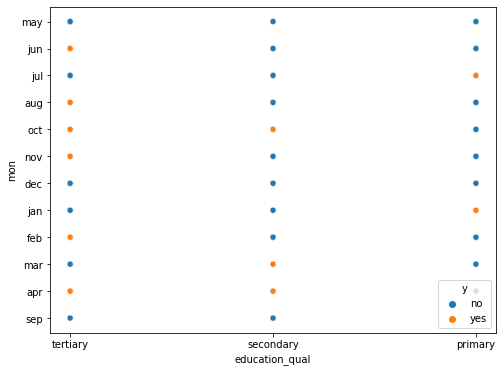

In [ ]:
plt.figure(figsize = (8,6))
sns.scatterplot(data=df,x='education_qual',y='mon',hue='y')

<AxesSubplot:xlabel='job', ylabel='day'>

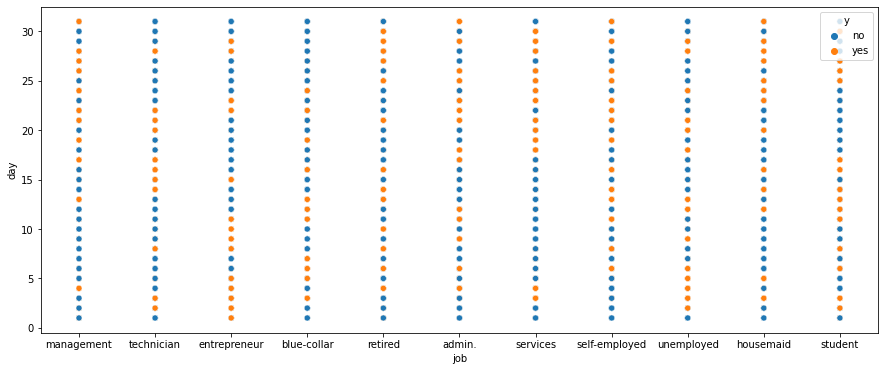

In [ ]:
plt.figure(figsize = (15,6))
sns.scatterplot(data=df,x='job',y='day',hue='y')

<AxesSubplot:xlabel='education_qual', ylabel='day'>

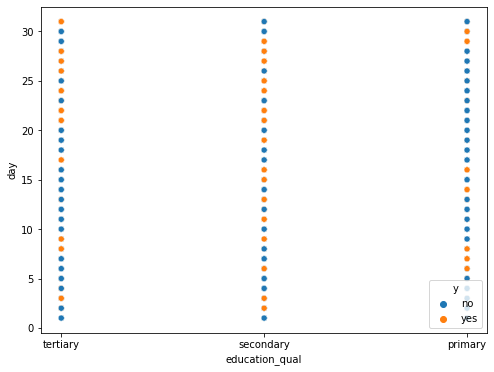

In [ ]:
plt.figure(figsize = (8,6))
sns.scatterplot(data=df,x='education_qual',y='day',hue='y')

In [ ]:
del df['target']

**Encode the data**

In [ ]:
df1 = df

In [ ]:
df1["job"] = df1["job"].map({'blue-collar': 0,'entrepreneur':1,'services':2,'housemaid':3,'technician':4,'self-employed':5,'admin.':6,
                             'management':7,'unemployed':8,'retired':9,'student':10})
df1["marital"] = df1["marital"].map({"divorced" : 1, "single" : 2,"married" : 0})
df1["education_qual"] = df1["education_qual"].map({"primary" : 0, "secondary" : 1,"tertiary" : 2})
df1["call_type"] = df1["call_type"].map({"unknown" : 0, "telephone" : 1,"cellular" : 2})
df1["mon"] = df1["mon"].map({'may': 0,'jul':1,'jan':2,'nov':3,'jun':4,'aug':5,'feb':6,
                             'apr':7,'oct':8,'sep':9,'dec':10,'mar':11})
df1["prev_outcome"] = df1["prev_outcome"].map({"unknown" : 0, "failure" : 1,"other":2,"success":3})
df1["y"] = df1["y"].map({"yes" : 1, "no" : 0})

In [ ]:

df1.head(2)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,7,0,2,0,5,0,261,1,0,0
1,44,4,2,1,0,5,0,151,1,0,0


In [ ]:
df1['y'].value_counts()

0    34120
1     3329
Name: y, dtype: int64

In [ ]:
# In this data 0 is morethan 75% so it is imbalanced data so convert into balanced data

In [ ]:
df1.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [ ]:
x = df1[['age', 'job', 'marital', 'education_qual', 'call_type','day', 'mon', 'dur',
       'num_calls','prev_outcome']].values

y = df1['y'].values

In [ ]:
# split the data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [ ]:
# Balance the data

In [ ]:
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')
x_train, y_train = smt.fit_resample(x_train, y_train)

In [ ]:
from collections import Counter

In [ ]:
print(Counter(y))
print(Counter(y_train))

Counter({0: 34120, 1: 3329})
Counter({1: 24680, 0: 18801})


In [ ]:
# so the data is balanced

In [ ]:
# Scale the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sc =scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:
# modeling the data
# In this data is classification data so to do all the classification ml models

In [ ]:
# logistic regression

from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = log.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 1])

In [ ]:
log.predict_proba(x_test)

array([[0.98663136, 0.01336864],
       [0.01090293, 0.98909707],
       [0.9904382 , 0.0095618 ],
       ...,
       [0.9540789 , 0.0459211 ],
       [0.8045763 , 0.1954237 ],
       [0.08347005, 0.91652995]])

In [ ]:
# score the data
score = log.score(x_test,y_test)
score

0.7319235287835095

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score
accuracy_score(y_test,y_pred)

0.7319235287835095

In [ ]:
f1_score(y_test,y_pred)

0.3725

In [ ]:
roc_auc_score(y_test,log.predict_proba(x_test)[:,1])

0.8774193898333749

In [ ]:
# knn model 
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i)
  knn.fit(x_train,y_train)
  print('K_value : ',i, 'cv_score: ',np.mean(cross_val_score(knn,x_train,y_train,cv=10,scoring='roc_auc')))

K_value :  1 cv_score:  0.9310520188288954
K_value :  2 cv_score:  0.9500959143231744
K_value :  3 cv_score:  0.9573807478723119
K_value :  4 cv_score:  0.9612703558126965
K_value :  5 cv_score:  0.9632078212451056
K_value :  6 cv_score:  0.9641100066737713
K_value :  7 cv_score:  0.9651749479083396
K_value :  8 cv_score:  0.9652171381005934
K_value :  9 cv_score:  0.9651533785233001
K_value :  10 cv_score:  0.9652340500329633
K_value :  20 cv_score:  0.9639028809489002
K_value :  50 cv_score:  0.9587017425074732


In [ ]:
# so in this data k=9 is a best value

In [ ]:
knn = KNeighborsClassifier(9)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.7780625867777422

In [ ]:
# evaluation
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,knn.predict_proba(x_test)[:,1])

0.875825030639624

In [ ]:
# Desicion tree classification 

In [ ]:
# Find the best depth value
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10]:
  dt = DecisionTreeClassifier(max_depth = i)
  dt.fit(x_train,y_train)
  print('depth_value = ', i , 'cv_score = ',np.mean(cross_val_score(dt,x_train,y_train,cv=10)))

depth_value =  1 cv_score =  0.7345047915719609
depth_value =  2 cv_score =  0.800073550518545
depth_value =  3 cv_score =  0.8276259883152616
depth_value =  4 cv_score =  0.8444148672314776
depth_value =  5 cv_score =  0.8539364281947461
depth_value =  6 cv_score =  0.869322876199691
depth_value =  7 cv_score =  0.8827539687559428
depth_value =  8 cv_score =  0.8924363699170129
depth_value =  9 cv_score =  0.9054535160511262
depth_value =  10 cv_score =  0.9122841952268104


In [ ]:
# best depth = 10

In [ ]:
dt = DecisionTreeClassifier(max_depth = 10)
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.7596924062800384

In [ ]:
#evaluation
from sklearn.metrics import roc_auc_score
dt = DecisionTreeClassifier(max_depth = 10)
dt.fit(x_train,y_train)
roc_auc_score(y_test,dt.predict_proba(x_test)[:,1])

0.8407964160401978

In [ ]:
# Feature importance

dt = DecisionTreeClassifier(max_depth = 10)

dt.fit(x_train, y_train)
importance = dt.feature_importances_
feature_names = np.array(['age', 'job', 'marital', 'education_qual', 'call_type','day', 'mon', 'dur',
       'num_calls','prev_outcome'])
for feature_name, importance in zip(feature_names, importance):
    print(f"{feature_name}: {importance:.4f}")

age: 0.0339
job: 0.0360
marital: 0.0026
education_qual: 0.0038
call_type: 0.1070
day: 0.0863
mon: 0.2072
dur: 0.4428
num_calls: 0.0275
prev_outcome: 0.0528


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

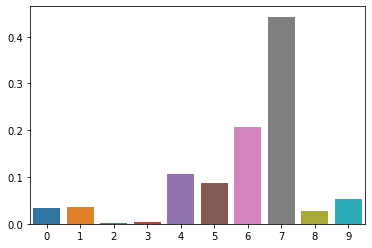

In [ ]:
importance = dt.feature_importances_
sns.barplot([x for x in range(len(importance))],importance)

So in this data the feature importants are,
1.   duration
2.   month
3.   call type
4.   day


In [ ]:
# voting Classifier
from sklearn.ensemble import VotingClassifier
model_1 = LogisticRegression()
model_2 = DecisionTreeClassifier(max_depth = 10)
model_3 = KNeighborsClassifier(9)
vc = VotingClassifier(estimators = [('lr',model_1),('dt',model_2),('knn',model_3)],voting='soft')
vc.fit(x_train,y_train)
y_pred = vc.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 1])

In [ ]:
vc.score(x_test,y_test)

0.7810530812773684

In [ ]:
# Evaluation
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,vc.predict_proba(x_test)[:,1])

0.8982476582871073

In [ ]:
# Random Foresting
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,max_depth = 10,max_features=  'sqrt')
rf = rfc.fit(x_train,y_train)
rfc.score(x_test,y_test)

0.7759265192780092

In [ ]:
# Evaluation
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,rfc.predict_proba(x_test)[:,1])

0.9075405185732033

In [ ]:
# XGboost

import xgboost as xgb
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12]:
  xb = xgb.XGBClassifier(learning_rate = lr,n_estimators=100,verbosity = 0)
  xb.fit(x_train,y_train)
  print('lr value = ',lr,'cv_score = ', np.mean(cross_val_score(xb,x_train,y_train,cv=10)))

lr value =  0.01 cv_score =  0.8977259573677756
lr value =  0.02 cv_score =  0.9088571366319869
lr value =  0.03 cv_score =  0.9160327385478967
lr value =  0.04 cv_score =  0.9217594354400116
lr value =  0.05 cv_score =  0.9255082960627309
lr value =  0.06 cv_score =  0.928843136226264
lr value =  0.07 cv_score =  0.9330978867076635
lr value =  0.08 cv_score =  0.9349148457607338
lr value =  0.09 cv_score =  0.9370078202160487
lr value =  0.1 cv_score =  0.9383187148945407
lr value =  0.11 cv_score =  0.9405956343949047
lr value =  0.12 cv_score =  0.9412856385261721


In [ ]:
xb = xgb.XGBClassifier(learning_rate = 0.12,n_estimators=100,verbosity = 0)
xb.fit(x_train,y_train)
xb.score(x_test,y_test)

0.8261241055217345

In [ ]:
# Evaluation
from sklearn.metrics import roc_auc_score
xb = xgb.XGBClassifier(learning_rate = 0.12,n_estimators=100,verbosity = 0)
xxb = xb.fit(x_train,y_train)
roc_auc_score(y_test,xb.predict_proba(x_test)[:,1])

0.9245074711726061

In [ ]:
# So all the above modeling the best model is XgboostClassifier


**For Prediction:**

In [ ]:
with open('scale.pkl', 'wb') as f:
    pickle.dump(sc, f)

In [ ]:
with open('model.pkl', 'wb') as f:
    pickle.dump(xxb, f)

In [ ]:
with open('scale.pkl', 'rb') as f:
    scaler = pickle.load(f)

In [ ]:
with open('model.pkl', 'rb') as f:
    xb = pickle.load(f)

In [ ]:
test = scaler.transform([[44,4,2,1,0,5,0,151,1,0]])

In [ ]:
prediction = xb.predict(test)
prediction

array([0])

**So in this data the feature importants are,**

1.  Duration of call 
2.  Month of call
3.  Call type
4.  Day of call